In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
sns.set(font_scale=2.0, style="white", color_codes=True)
plt.rcParams['figure.figsize'] = (12, 9)

In [3]:
def normalize(xs):
    max_x = max(xs)
    min_x = min(xs)
    return [(x-min_x)/(max_x-min_x) for x in xs]

In [4]:
df_10_20 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-10-20.csv").dropna()
df_10_27 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-10-27.csv").dropna()
df_11_03 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-11-03.csv").dropna()
df_11_10 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-11-10.csv").dropna()
df_11_17 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-11-17.csv").dropna()
df_11_22 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-11-22.csv").dropna()
df_12_01 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-12-01.csv").dropna()
df_12_08 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-12-08.csv").dropna()
df_12_15 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-12-15.csv").dropna()
base = pd.read_csv("../data/Spreadsheet/Lettuce/base.csv")

In [5]:
df_10_27.head()

,Nitrogen,Irrigation,Replication,Plant Number,Chlorophyll,NDVI,WP,Average Height,Average Leaf Count
0,0,0,1,104,48.9,0.805878,-4.80,6,7
2,0,0,2,104,48.8,0.839747,-4.24,4,6
4,0,0,3,104,51.9,0.812323,-4.82,7,6
6,0,25,1,104,43.7,0.814818,-1.35,6,7
8,0,25,2,104,45.8,0.826363,-1.38,8,8


In [6]:
df = pd.concat([df_10_27, df_11_03, df_11_10, df_11_17, df_11_22, df_12_01, df_12_08, df_12_15])

In [7]:
# Drop data of area with broken irrigation
df = df[(df.Nitrogen != 25) | (df.Irrigation != 0) | (df.Replication != 3)]

In [8]:
df.describe()

,Nitrogen,Irrigation,Replication,Plant Number,Chlorophyll,NDVI,WP,Average Height,Average Leaf Count
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,44.148936,44.680851,1.978723,152.875000,42.709043,0.814938,-1.722952,19.478723,17.936170
std,37.314078,36.855093,0.812945,49.700895,6.050822,0.039286,1.395958,7.746626,6.091408
min,0.000000,0.000000,1.000000,102.000000,5.700000,0.330635,-4.950000,4.000000,5.000000
25%,0.000000,25.000000,1.000000,103.750000,39.000000,0.798832,-1.950000,13.750000,13.000000
50%,50.000000,50.000000,2.000000,152.500000,42.350000,0.818785,-1.180000,19.000000,19.000000
75%,100.000000,100.000000,3.000000,202.250000,46.825000,0.837929,-0.730000,24.250000,23.000000
max,100.000000,100.000000,3.000000,204.000000,60.900000,0.896409,-0.400000,45.000000,35.000000


F_onewayResult(statistic=2293.7601341541063, pvalue=1.7309784502072527e-239)
Ttest_indResult(statistic=8.36577853867449, pvalue=1.2656884668549148e-14)
Ttest_indResult(statistic=4.702019977528652, pvalue=4.941022024199116e-06)
Ttest_indResult(statistic=61.87592367065316, pvalue=3.5927819065930137e-124)
(0.7604466719177146, 4.102015837222987e-72)


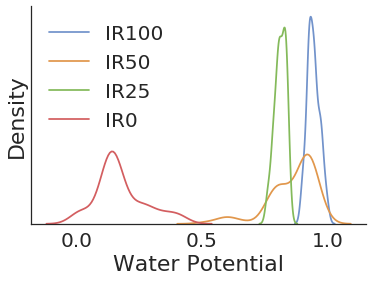

In [9]:
df["WP"] = normalize(df["WP"])
ir100 = df[df["Irrigation"] == 100]["WP"]
ir50 = df[df["Irrigation"] == 50]["WP"]
ir25 = df[df["Irrigation"] == 25]["WP"]
ir0 = df[df["Irrigation"] == 0]["WP"]

g = sns.distplot(ir100, bins=16, hist=False, color="#7293CB", label="IR100")
sns.distplot(ir50,  bins=16, hist=False, color="#E1974C", label="IR50")
sns.distplot(ir25,  bins=16, hist=False, color="#84BA5B", label="IR25")
sns.distplot(ir0,   bins=16, hist=False, color="#D35E60", label="IR0", axlabel="Water Potential")
sns.despine()
g.set(yticks=[], ylabel="Density")
print(stats.f_oneway(ir100, ir50, ir25, ir0))
print(stats.ttest_ind(ir100, ir50))
print(stats.ttest_ind(ir50, ir25))
print(stats.ttest_ind(ir25, ir0))
print(stats.pearsonr(df["WP"], df["Irrigation"]))
plt.savefig("ir_wp.png")

F_onewayResult(statistic=20.701126315453266, pvalue=2.0012474841698827e-12)
Ttest_indResult(statistic=3.9162832877190032, pvalue=0.00012530320795665808)
Ttest_indResult(statistic=1.9475967235164202, pvalue=0.05293681761114508)
Ttest_indResult(statistic=1.4994293352739965, pvalue=0.13549490144770246)
(0.3762482434717375, 4.330087208833029e-14)


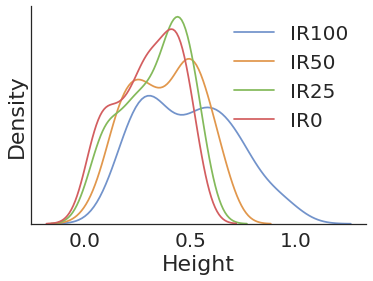

In [10]:
df["Average Height"] = normalize(df["Average Height"])
ir100 = df[df["Irrigation"] == 100]["Average Height"]
ir50 = df[df["Irrigation"] == 50]["Average Height"]
ir25 = df[df["Irrigation"] == 25]["Average Height"]
ir0 = df[df["Irrigation"] == 0]["Average Height"]

g = sns.distplot(ir100, bins=16, hist=False, color="#7293CB", label="IR100")
sns.distplot(ir50,  bins=16, hist=False, color="#E1974C", label="IR50")
sns.distplot(ir25,  bins=16, hist=False, color="#84BA5B", label="IR25")
sns.distplot(ir0,   bins=16, hist=False, color="#D35E60", label="IR0", axlabel="Height")
sns.despine()
g.set(yticks=[], ylabel="Density")
print(stats.f_oneway(ir100, ir50, ir25, ir0))
print(stats.ttest_ind(ir100, ir50))
print(stats.ttest_ind(ir50, ir25))
print(stats.ttest_ind(ir25, ir0))
print(stats.pearsonr(df["Average Height"], df["Irrigation"]))
plt.savefig("ir_height.png")

F_onewayResult(statistic=7.6535473551289215, pvalue=5.623414663602709e-05)
Ttest_indResult(statistic=2.8457355478782644, pvalue=0.00491728111429339)
Ttest_indResult(statistic=1.3230039438793701, pvalue=0.1874240731836774)
Ttest_indResult(statistic=-0.1836562619253071, pvalue=0.8544875742009461)
(0.229516166123877, 6.93015545429133e-06)


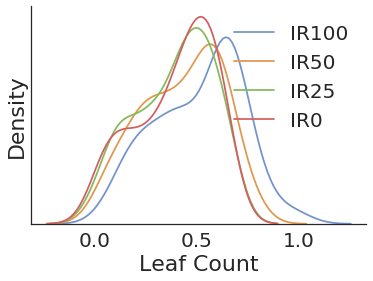

In [11]:
df["Average Leaf Count"] = normalize(df["Average Leaf Count"])
ir100 = df[df["Irrigation"] == 100]["Average Leaf Count"]
ir50 = df[df["Irrigation"] == 50]["Average Leaf Count"]
ir25 = df[df["Irrigation"] == 25]["Average Leaf Count"]
ir0 = df[df["Irrigation"] == 0]["Average Leaf Count"]

g = sns.distplot(ir100, bins=16, hist=False, color="#7293CB", label="IR100")
sns.distplot(ir50,  bins=16, hist=False, color="#E1974C", label="IR50")
sns.distplot(ir25,  bins=16, hist=False, color="#84BA5B", label="IR25")
sns.distplot(ir0,   bins=16, hist=False, color="#D35E60", label="IR0", axlabel="Leaf Count")
sns.despine()
g.set(yticks=[], ylabel="Density")
print(stats.f_oneway(ir100, ir50, ir25, ir0))
print(stats.ttest_ind(ir100, ir50))
print(stats.ttest_ind(ir50, ir25))
print(stats.ttest_ind(ir25, ir0))
print(stats.pearsonr(df["Average Leaf Count"], df["Irrigation"]))
plt.savefig("ir_lc.png")

F_onewayResult(statistic=0.7499102967453053, pvalue=0.5229514904878361)
Ttest_indResult(statistic=-1.0508955639806699, pvalue=0.2946413300558421)
Ttest_indResult(statistic=0.78069320574289, pvalue=0.4359545248683522)
Ttest_indResult(statistic=-0.8971100310252967, pvalue=0.3708453524778559)
(-0.06077105161956764, 0.23977168628738918)


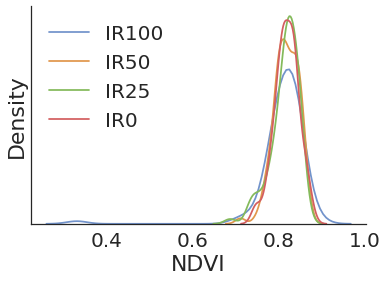

In [12]:
ir100 = df[df["Irrigation"] == 100]["NDVI"]
ir50 = df[df["Irrigation"] == 50]["NDVI"]
ir25 = df[df["Irrigation"] == 25]["NDVI"]
ir0 = df[df["Irrigation"] == 0]["NDVI"]

g = sns.distplot(ir100, bins=16, hist=False, color="#7293CB", label="IR100")
sns.distplot(ir50,  bins=16, hist=False, color="#E1974C", label="IR50")
sns.distplot(ir25,  bins=16, hist=False, color="#84BA5B", label="IR25")
sns.distplot(ir0,   bins=16, hist=False, color="#D35E60", label="IR0", axlabel="NDVI")
sns.despine()
g.set(yticks=[], ylabel="Density")
plt.ylim(0, 14.5)
print(stats.f_oneway(ir100, ir50, ir25, ir0))
print(stats.ttest_ind(ir100, ir50))
print(stats.ttest_ind(ir50, ir25))
print(stats.ttest_ind(ir25, ir0))
print(stats.pearsonr(df["NDVI"], df["Irrigation"]))

F_onewayResult(statistic=2.335191100582409, pvalue=0.07351747747958698)
Ttest_indResult(statistic=-1.3086077202681872, pvalue=0.19224794795472375)
Ttest_indResult(statistic=1.7546692442197618, pvalue=0.08099871242484648)
Ttest_indResult(statistic=-2.414370014974481, pvalue=0.016752880434221667)
(-0.07765767715492113, 0.1328145141229302)


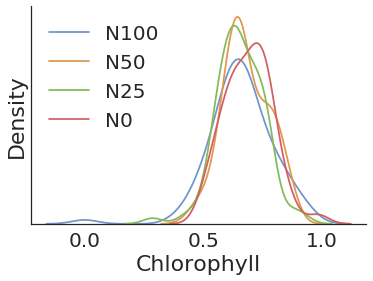

In [13]:
df["Chlorophyll"] = normalize(df["Chlorophyll"])
n100 = df[df["Nitrogen"] == 100]["Chlorophyll"]
n50 = df[df["Nitrogen"] == 50]["Chlorophyll"]
n25 = df[df["Nitrogen"] == 25]["Chlorophyll"]
n0 = df[df["Nitrogen"] == 0]["Chlorophyll"]

g = sns.distplot(n100, bins=16, hist=False, color="#7293CB", label="N100")
sns.distplot(n50,  bins=16, hist=False, color="#E1974C", label="N50")
sns.distplot(n25,  bins=16, hist=False, color="#84BA5B", label="N25")
sns.distplot(n0,   bins=16, hist=False, color="#D35E60", label="N0", axlabel="Chlorophyll")
sns.despine()
g.set(yticks=[], ylabel="Density")
print(stats.f_oneway(n100, n50, n25, n0))
print(stats.ttest_ind(n100, n50))
print(stats.ttest_ind(n50, n25))
print(stats.ttest_ind(n25, n0))
print(stats.pearsonr(df["Chlorophyll"], df["Nitrogen"]))
plt.savefig("n_chlorophyll.png")

In [21]:
df["Chlorophyll"] = normalize(df["Chlorophyll"])
values = [100, 50, 25, 0]
treatments = {}
for i in values:
    for j in values:
        treatments["N{}IR{}".format(i, j)] = df[(df["Nitrogen"] == i) & (df["Irrigation"] == j)]["Chlorophyll"].mean()
        

# g = sns.distplot(n100, bins=16, hist=False, color="#7293CB", label="N100", axlabel="Chlorophyll")
# sns.despine()
# g.set(yticks=[], ylabel="Density")
# print(stats.pearsonr(df["Chlorophyll"], df["Nitrogen"]))
for key in sorted(treatments, key=treatments.get, reverse=True):
    print(key, treatments[key])

N100IR0 0.7247886473429951
N50IR25 0.7149003623188405
N50IR0 0.7127113526570049
N0IR25 0.6985205314009661
N0IR0 0.6950483091787439
N0IR50 0.6902928743961354
N25IR50 0.6808574879227053
N25IR0 0.6790081521739131
N50IR50 0.6749698067632851
N0IR100 0.6746678743961353
N25IR25 0.6710446859903382
N100IR50 0.6597222222222223
N100IR25 0.6501358695652174
N50IR100 0.6151871980676329
N100IR100 0.5945803140096618
N25IR100 0.5936745169082126


In [ ]:
n100 = df[df["Nitrogen"] == 100]["Average Height"]
n50 = df[df["Nitrogen"] == 50]["Average Height"]
n25 = df[df["Nitrogen"] == 25]["Average Height"]
n0 = df[df["Nitrogen"] == 0]["Average Height"]

g = sns.distplot(n100, bins=16, hist=False, color="#7293CB", label="N100")
sns.distplot(n50,  bins=16, hist=False, color="#E1974C", label="N50")
sns.distplot(n25,  bins=16, hist=False, color="#84BA5B", label="N25")
sns.distplot(n0,   bins=16, hist=False, color="#D35E60", label="N0", axlabel="Height")
sns.despine()
g.set(yticks=[], ylabel="Density")
print(stats.f_oneway(n100, n50, n25, n0))
print(stats.ttest_ind(n100, n50))
print(stats.ttest_ind(n50, n25))
print(stats.ttest_ind(n25, n0))
print(stats.pearsonr(df["Average Height"], df["Nitrogen"]))
plt.savefig("n_height.png")

In [ ]:
n100 = df[df["Nitrogen"] == 100]["Average Leaf Count"]
n50 = df[df["Nitrogen"] == 50]["Average Leaf Count"]
n25 = df[df["Nitrogen"] == 25]["Average Leaf Count"]
n0 = df[df["Nitrogen"] == 0]["Average Leaf Count"]

g = sns.distplot(n100, bins=16, hist=False, color="#7293CB", label="N100")
sns.distplot(n50,  bins=16, hist=False, color="#E1974C", label="N50")
sns.distplot(n25,  bins=16, hist=False, color="#84BA5B", label="N25")
sns.distplot(n0,   bins=16, hist=False, color="#D35E60", label="N0", axlabel="Leaf Count")
sns.despine()
g.set(yticks=[], ylabel="Density")
print(stats.f_oneway(n100, n50, n25, n0))
print(stats.ttest_ind(n100, n50))
print(stats.ttest_ind(n50, n25))
print(stats.ttest_ind(n25, n0))
print(stats.pearsonr(df["Average Leaf Count"], df["Nitrogen"]))
plt.savefig("n_lc.png")

In [ ]:
n100 = df[df["Nitrogen"] == 100]["NDVI"]
n50 = df[df["Nitrogen"] == 50]["NDVI"]
n25 = df[df["Nitrogen"] == 25]["NDVI"]
n0 = df[df["Nitrogen"] == 0]["NDVI"]

g = sns.distplot(n100, bins=16, hist=False, color="#7293CB", label="N100")
sns.distplot(n50,  bins=16, hist=False, color="#E1974C", label="N50")
sns.distplot(n25,  bins=16, hist=False, color="#84BA5B", label="N25")
sns.distplot(n0,   bins=16, hist=False, color="#D35E60", label="N0", axlabel="NDVI")
sns.despine()
g.set(yticks=[], ylabel="Density")
plt.ylim(0, 14.5)
print(stats.f_oneway(n100, n50, n25, n0))
print(stats.ttest_ind(n100, n50))
print(stats.ttest_ind(n50, n25))
print(stats.ttest_ind(n25, n0))
print(stats.pearsonr(df["NDVI"], df["Nitrogen"]))